In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
# Load the dataset
data = pd.read_csv('../data/data.csv')

# Inspect the first few rows
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Create aggregate features
aggregate_features = data.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    avg_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std')
).reset_index()

# Replace NaN values in the standard deviation with 0 (in case of single transactions)
aggregate_features['std_transaction_amount'].fillna(0, inplace=True)

# Display the aggregated dataset
aggregate_features.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_24160\3169328937.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregate_features['std_transaction_amount'].fillna(0, inplace=True)


,CustomerId,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,CustomerId_1,-10000.0,-10000.000000,1,0.000000
1,CustomerId_10,-10000.0,-10000.000000,1,0.000000
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146


In [4]:
# Save the processed data
aggregate_features.to_csv('../data/processed/aggregate_features.csv', index=False)
print("Aggregate features saved to processed folder.")


Aggregate features saved to processed folder.


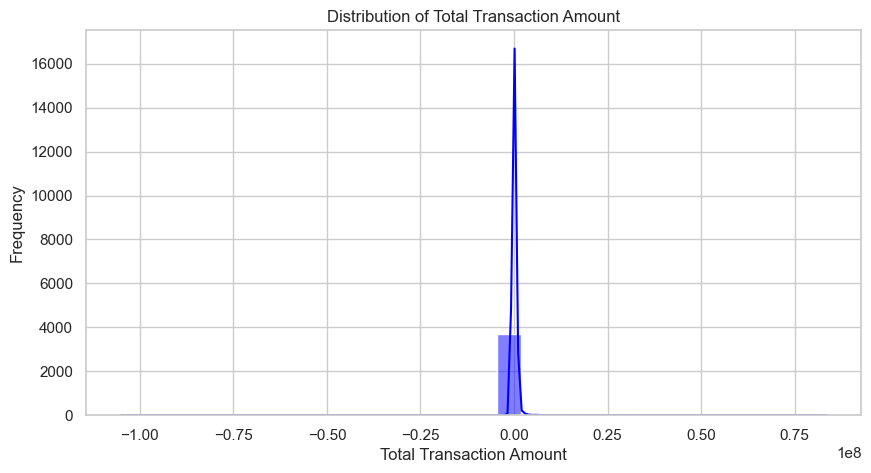

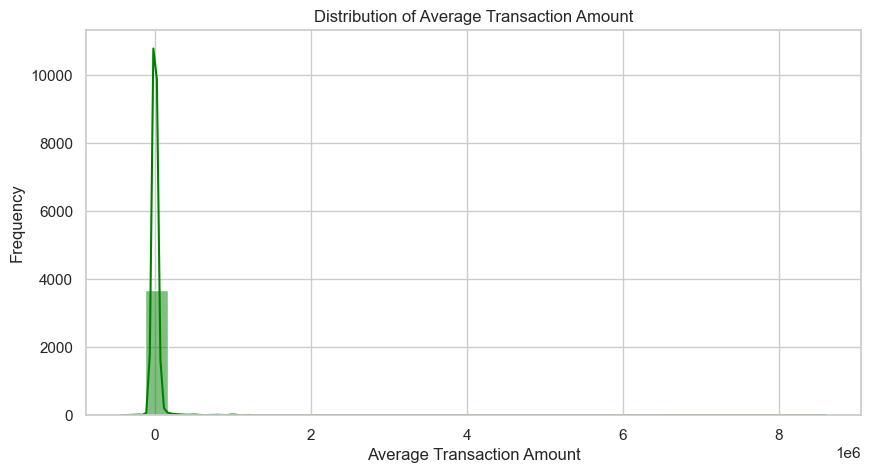

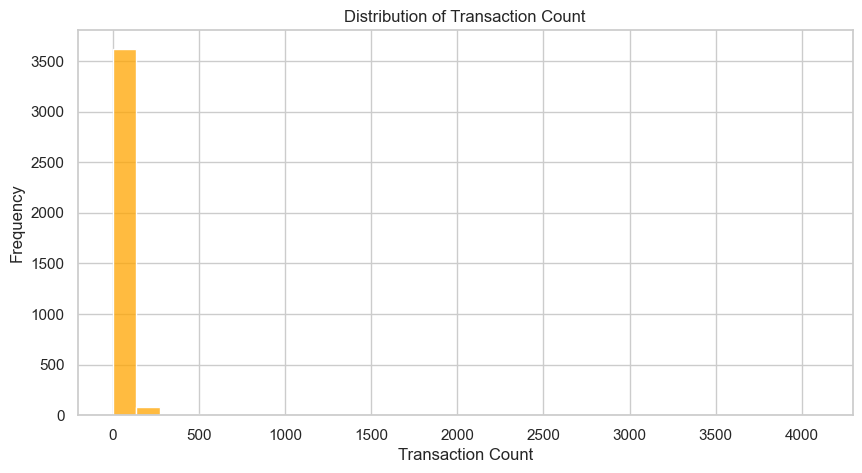

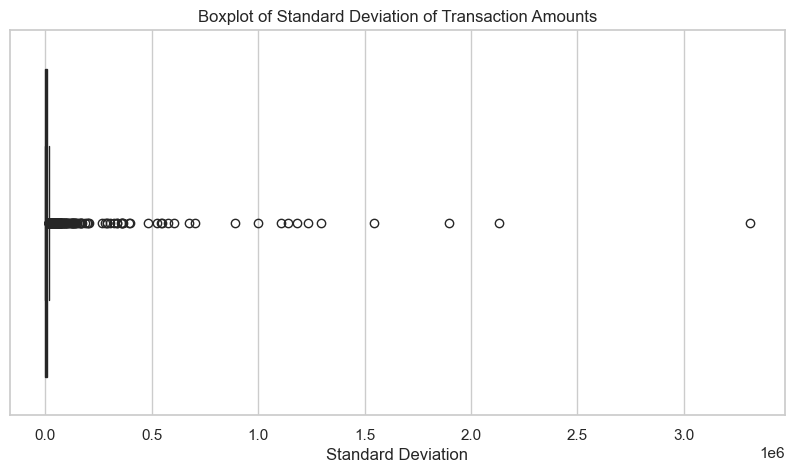

In [5]:
# Total Transaction Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(aggregate_features['total_transaction_amount'], kde=True, color='blue', bins=30)
plt.title("Distribution of Total Transaction Amount")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Average Transaction Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(aggregate_features['avg_transaction_amount'], kde=True, color='green', bins=30)
plt.title("Distribution of Average Transaction Amount")
plt.xlabel("Average Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Transaction Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(aggregate_features['transaction_count'], kde=False, color='orange', bins=30)
plt.title("Distribution of Transaction Count")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.show()

# Standard Deviation of Transaction Amounts
plt.figure(figsize=(10, 5))
sns.boxplot(x=aggregate_features['std_transaction_amount'], color='purple')
plt.title("Boxplot of Standard Deviation of Transaction Amounts")
plt.xlabel("Standard Deviation")
plt.show()


In [6]:
# Convert TransactionStartTime to datetime
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], errors='coerce')

# Extract features
data['transaction_hour'] = data['TransactionStartTime'].dt.hour
data['transaction_day'] = data['TransactionStartTime'].dt.day
data['transaction_month'] = data['TransactionStartTime'].dt.month
data['transaction_year'] = data['TransactionStartTime'].dt.year

# Inspect the new columns
data[['TransactionStartTime', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']].head()


,TransactionStartTime,transaction_hour,transaction_day,transaction_month,transaction_year
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018


In [7]:
# Example written outputs for extracted features
for i, row in data.head(10).iterrows():
    print(
        f"Transaction occurred at hour {row['transaction_hour']} of day {row['transaction_day']} "
        f"in month {row['transaction_month']} of the year {row['transaction_year']}."
    )


Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 4 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 4 of day 15 in month 11 of the year 2018.


In [8]:
# Example written outputs for extracted features
for i, row in data.head(10).iterrows():
    print(
        f"Transaction occurred at hour {row['transaction_hour']} of day {row['transaction_day']} "
        f"in month {row['transaction_month']} of the year {row['transaction_year']}."
    )


Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 2 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 3 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 4 of day 15 in month 11 of the year 2018.
Transaction occurred at hour 4 of day 15 in month 11 of the year 2018.


C:\Users\hp\AppData\Local\Temp\ipykernel_24160\616533792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['transaction_hour'], palette="Blues_r")


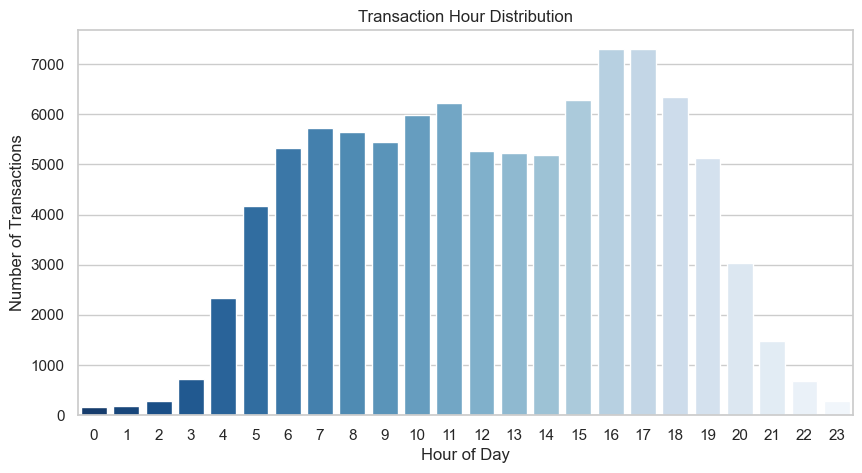

C:\Users\hp\AppData\Local\Temp\ipykernel_24160\616533792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['transaction_day'], palette="Greens_r")


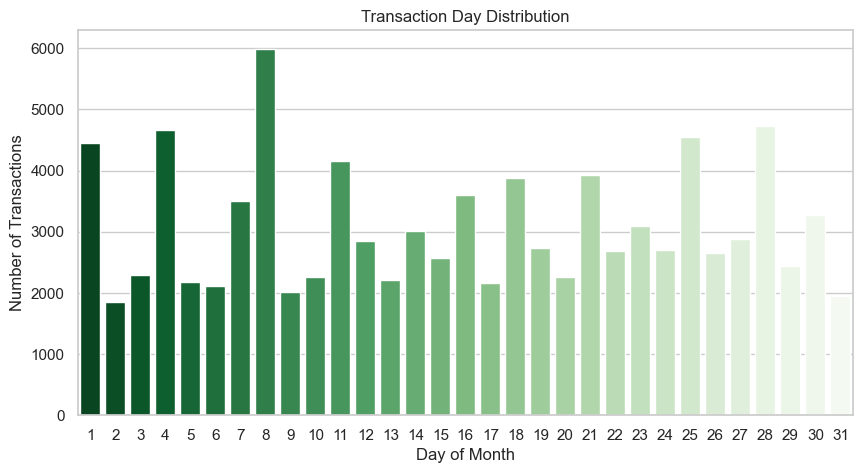

C:\Users\hp\AppData\Local\Temp\ipykernel_24160\616533792.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['transaction_month'], palette="Purples_r")


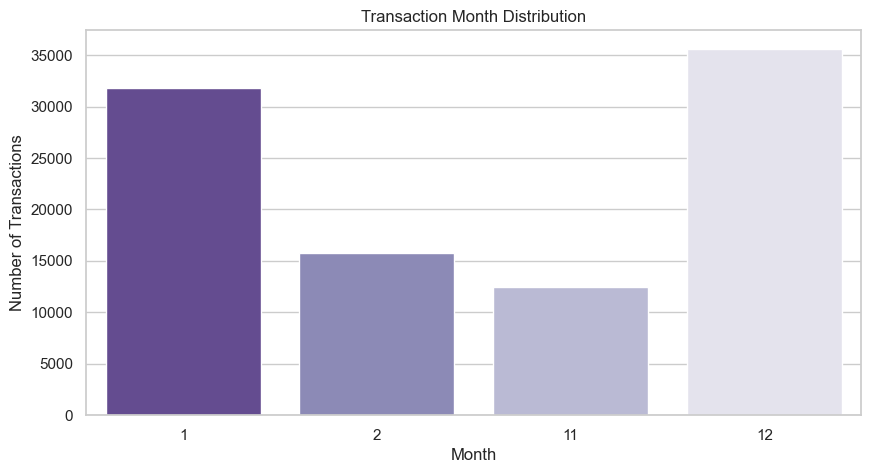

C:\Users\hp\AppData\Local\Temp\ipykernel_24160\616533792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['transaction_year'], palette="Oranges_r")


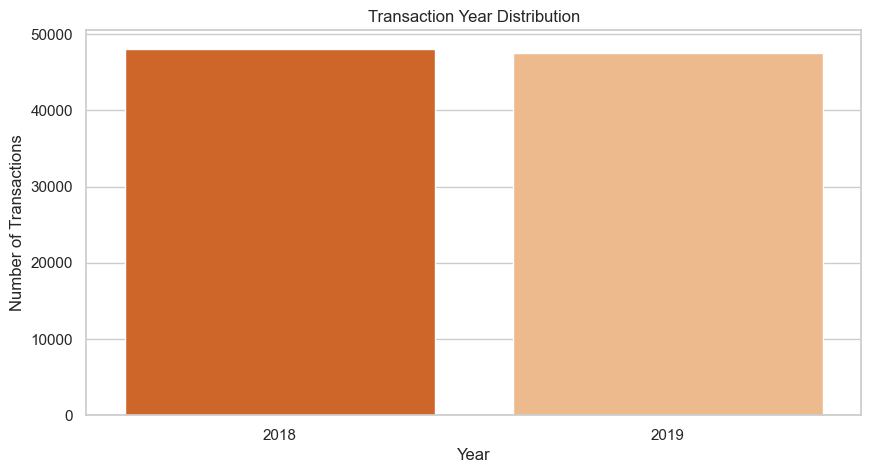

In [9]:
# Transaction Hour Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=data['transaction_hour'], palette="Blues_r")
plt.title("Transaction Hour Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()

# Transaction Day Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=data['transaction_day'], palette="Greens_r")
plt.title("Transaction Day Distribution")
plt.xlabel("Day of Month")
plt.ylabel("Number of Transactions")
plt.show()

# Transaction Month Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=data['transaction_month'], palette="Purples_r")
plt.title("Transaction Month Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

# Transaction Year Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=data['transaction_year'], palette="Oranges_r")
plt.title("Transaction Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.show()


In [10]:
# One-Hot Encoding for ChannelId
channel_dummies = pd.get_dummies(data['ChannelId'], prefix='Channel')
data = pd.concat([data, channel_dummies], axis=1)

# Display the updated dataset
data[['ChannelId'] + list(channel_dummies.columns)].head()


,ChannelId,Channel_ChannelId_1,Channel_ChannelId_2,Channel_ChannelId_3,Channel_ChannelId_5
0,ChannelId_3,False,False,True,False
1,ChannelId_2,False,True,False,False
2,ChannelId_3,False,False,True,False
3,ChannelId_3,False,False,True,False
4,ChannelId_2,False,True,False,False


In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ProductCategory
label_encoder = LabelEncoder()
data['ProductCategory_encoded'] = label_encoder.fit_transform(data['ProductCategory'])

# Display the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# Display the updated dataset
data[['ProductCategory', 'ProductCategory_encoded']].head()


Label Encoding Mapping:
{'airtime': np.int64(0), 'data_bundles': np.int64(1), 'financial_services': np.int64(2), 'movies': np.int64(3), 'other': np.int64(4), 'ticket': np.int64(5), 'transport': np.int64(6), 'tv': np.int64(7), 'utility_bill': np.int64(8)}


,ProductCategory,ProductCategory_encoded
0,airtime,0
1,financial_services,2
2,airtime,0
3,utility_bill,8
4,financial_services,2


In [12]:
# Example written outputs
for i, row in data[['ProductCategory', 'ProductCategory_encoded']].head(10).iterrows():
    print(f"Product Category '{row['ProductCategory']}' was encoded as {row['ProductCategory_encoded']}.")


Product Category 'airtime' was encoded as 0.
Product Category 'financial_services' was encoded as 2.
Product Category 'airtime' was encoded as 0.
Product Category 'utility_bill' was encoded as 8.
Product Category 'financial_services' was encoded as 2.
Product Category 'airtime' was encoded as 0.
Product Category 'airtime' was encoded as 0.
Product Category 'financial_services' was encoded as 2.
Product Category 'airtime' was encoded as 0.
Product Category 'financial_services' was encoded as 2.


Missing Values:
 TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
transaction_hour           0
transaction_day            0
transaction_month          0
transaction_year           0
Channel_ChannelId_1        0
Channel_ChannelId_2        0
Channel_ChannelId_3        0
Channel_ChannelId_5        0
ProductCategory_encoded    0
dtype: int64

Missing Percentage:
 TransactionId              0.0
BatchId                    0.0
AccountId                  0.0
SubscriptionId             0.0
CustomerId                 0.0
CurrencyCode               0.0
CountryCode                0.0
Provid

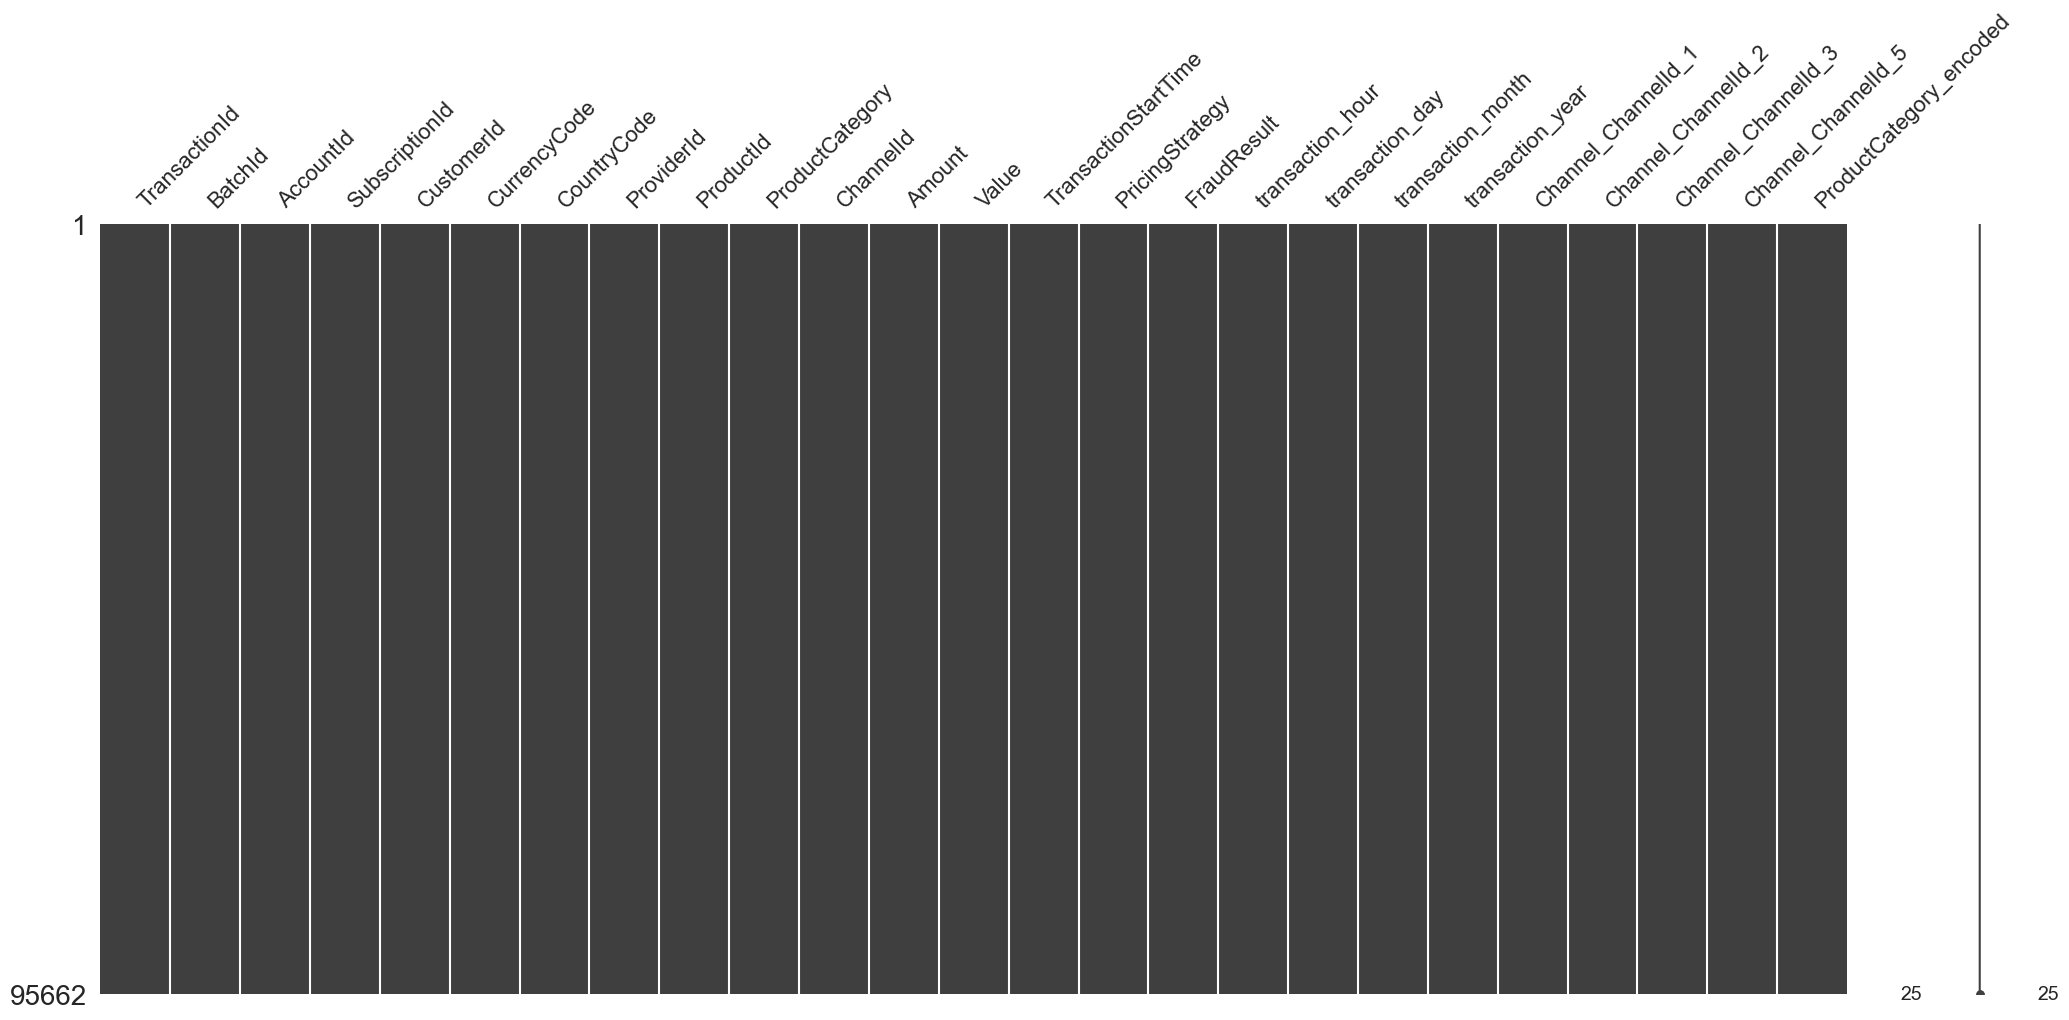

In [15]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Display missing values
print("Missing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)

# Visualize missing data
import missingno as msno
msno.matrix(data)
plt.show()


In [16]:
# Example of Imputation
data['Amount'] = data['Amount'].fillna(data['Amount'].mean())  # Mean imputation for numerical column
data['ProductCategory'] = data['ProductCategory'].fillna(data['ProductCategory'].mode()[0])  # Mode imputation for categorical column

print("After imputation, missing values:")
print(data.isnull().sum())


After imputation, missing values:
TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
transaction_hour           0
transaction_day            0
transaction_month          0
transaction_year           0
Channel_ChannelId_1        0
Channel_ChannelId_2        0
Channel_ChannelId_3        0
Channel_ChannelId_5        0
ProductCategory_encoded    0
dtype: int64


In [17]:
# Remove rows or columns with significant missing values
data_dropped = data.dropna()  # Drops rows with any missing values
print(f"After removal, dataset shape: {data_dropped.shape}")


After removal, dataset shape: (95662, 25)


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Amount', 'Value', 'transaction_hour', 'transaction_day', 'transaction_month']

# Initialize MinMaxScaler
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# View normalized data
print(data_normalized[numerical_cols].head())


     Amount     Value  transaction_hour  transaction_day  transaction_month
0  0.092004  0.000101          0.086957         0.466667           0.909091
1  0.091910  0.000002          0.086957         0.466667           0.909091
2  0.091958  0.000050          0.086957         0.466667           0.909091
3  0.093750  0.002206          0.130435         0.466667           0.909091
4  0.091853  0.000065          0.130435         0.466667           0.909091


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# View standardized data
print(data_standardized[numerical_cols].head())


     Amount     Value  transaction_hour  transaction_day  transaction_month
0 -0.046371 -0.072291         -2.155530        -0.100739           0.848684
1 -0.054643 -0.080251         -2.155530        -0.100739           0.848684
2 -0.050426 -0.076352         -2.155530        -0.100739           0.848684
3  0.107717  0.096648         -1.949214        -0.100739           0.848684
4 -0.059704 -0.075183         -1.949214        -0.100739           0.848684


In [20]:
# Save normalized and standardized datasets
data_normalized.to_csv('../data/processed/data_normalized.csv', index=False)
data_standardized.to_csv('../data/processed/data_standardized.csv', index=False)

print("Normalized and standardized datasets saved successfully.")


Normalized and standardized datasets saved successfully.


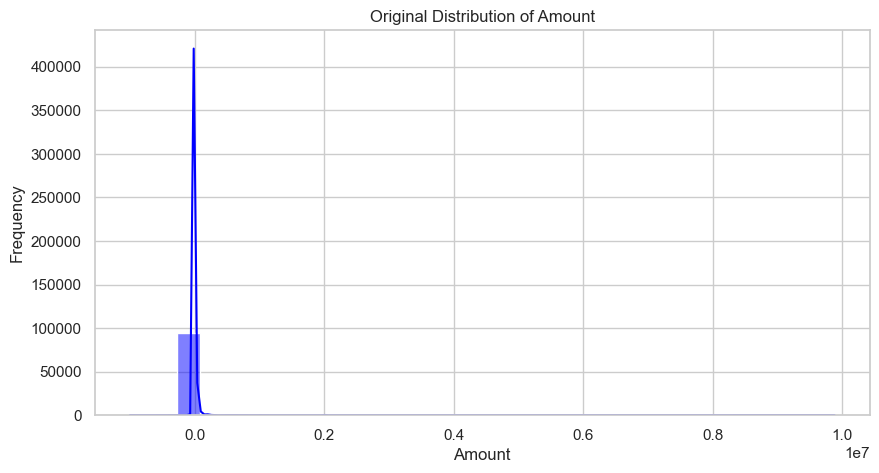

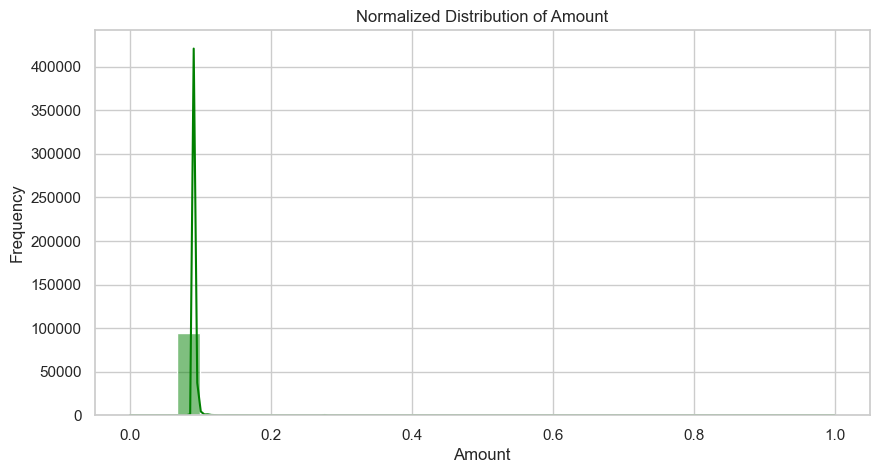

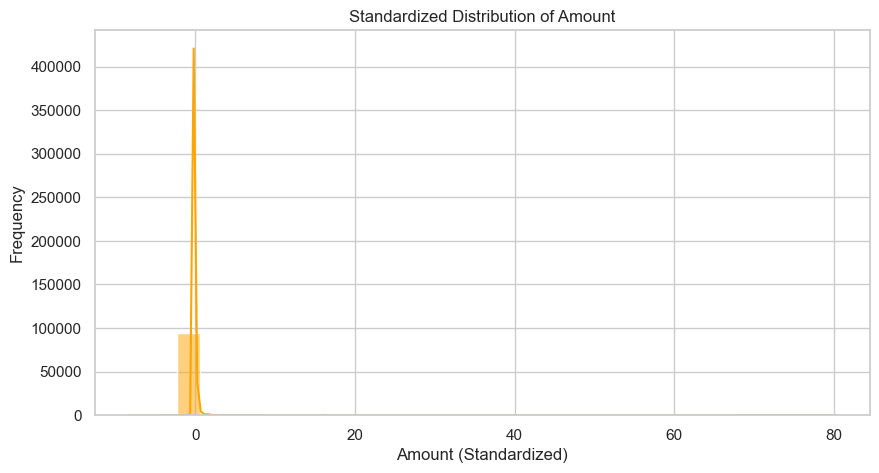

In [21]:
# Original Data Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], kde=True, color='blue', bins=30)
plt.title("Original Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Normalized Data Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_normalized['Amount'], kde=True, color='green', bins=30)
plt.title("Normalized Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Standardized Data Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_standardized['Amount'], kde=True, color='orange', bins=30)
plt.title("Standardized Distribution of Amount")
plt.xlabel("Amount (Standardized)")
plt.ylabel("Frequency")
plt.show()


In [26]:
# Compute RFMS Features
rfms = data.groupby('CustomerId').agg(
    recency=('TransactionStartTime', lambda x: (data['TransactionStartTime'].max() - x.max()).days),
    frequency=('TransactionId', 'count'),
    monetary=('Amount', 'sum'),
    severity=('FraudResult', 'mean')  # Proportion of fraudulent transactions
).reset_index()

# Handle missing values in severity
rfms['severity'] = rfms['severity'].fillna(0)

# Display RFMS data
rfms.head()


,CustomerId,recency,frequency,monetary,severity
0,CustomerId_1,83,1,-10000.0,0.0
1,CustomerId_10,83,1,-10000.0,0.0
2,CustomerId_1001,89,5,20000.0,0.0
3,CustomerId_1002,25,11,4225.0,0.0
4,CustomerId_1003,11,6,20000.0,0.0


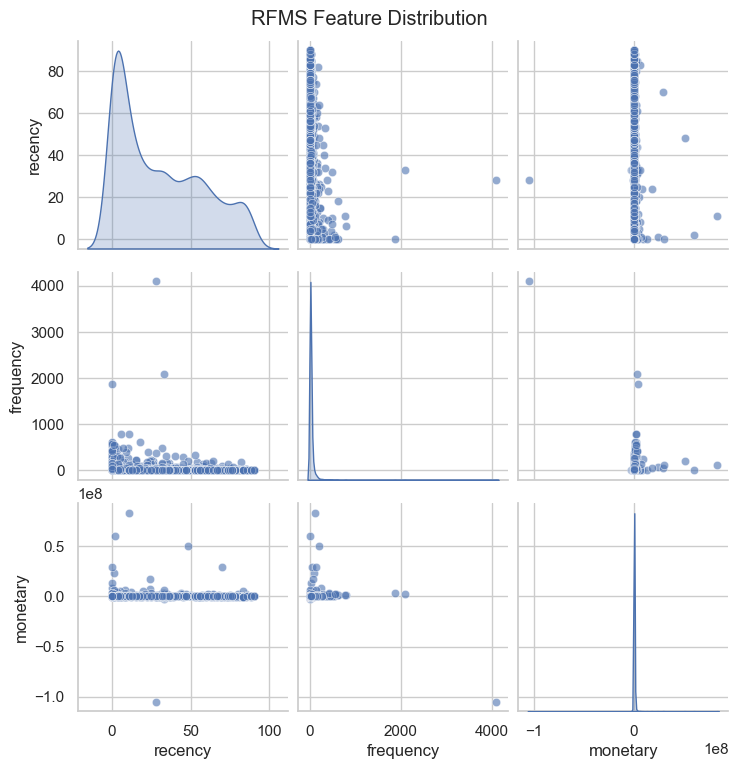

In [27]:
# Pairplot to visualize RFMS distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(rfms[['recency', 'frequency', 'monetary']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("RFMS Feature Distribution", y=1.02)
plt.show()


In [28]:
# Define RFMS thresholds (can be adjusted based on EDA insights)
recency_threshold = rfms['recency'].quantile(0.75)  # Top 25% most recent
frequency_threshold = rfms['frequency'].quantile(0.25)  # Bottom 25% least frequent
monetary_threshold = rfms['monetary'].quantile(0.25)  # Bottom 25% lowest spenders

# Assign Good (1) and Bad (0) labels
rfms['risk_label'] = ((rfms['recency'] <= recency_threshold) & 
                      (rfms['frequency'] >= frequency_threshold) & 
                      (rfms['monetary'] >= monetary_threshold)).astype(int)

# Display labeled RFMS data
rfms.head()


,CustomerId,recency,frequency,monetary,severity,risk_label
0,CustomerId_1,83,1,-10000.0,0.0,0
1,CustomerId_10,83,1,-10000.0,0.0,0
2,CustomerId_1001,89,5,20000.0,0.0,0
3,CustomerId_1002,25,11,4225.0,0.0,1
4,CustomerId_1003,11,6,20000.0,0.0,1


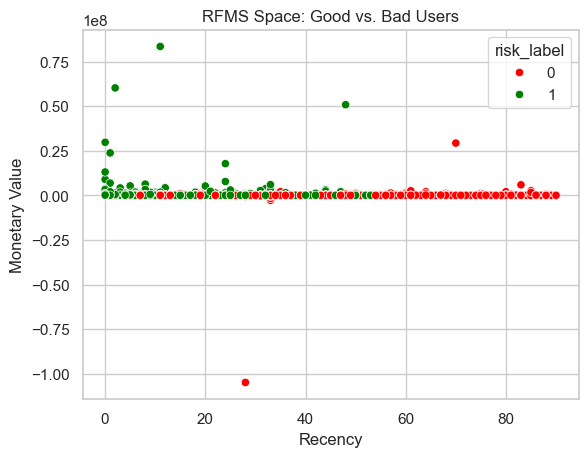

In [29]:
# Visualize RFMS with labels
sns.scatterplot(data=rfms, x='recency', y='monetary', hue='risk_label', palette={0: 'red', 1: 'green'})
plt.title("RFMS Space: Good vs. Bad Users")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.show()


In [36]:

import sys
import os

# Add the parent directory of 'scripts' to the Python path
sys.path.append(os.path.abspath('../'))  # Adjust the relative path as needed

from scripts.feature_engineering import compute_rfms, apply_woe_binning

# Compute RFMS features
rfms = compute_rfms(data, 'TransactionStartTime', 'Amount', 'FraudResult', 'CustomerId')

# Verify the computed RFMS features
print(rfms.head())  # Ensure 'recency', 'frequency', and 'monetary' are populated

# Define thresholds for 'risk_label'
recency_threshold = rfms['recency'].quantile(0.75)
frequency_threshold = rfms['frequency'].quantile(0.25)
monetary_threshold = rfms['monetary'].quantile(0.25)

# Create 'risk_label'
rfms['risk_label'] = ((rfms['recency'] <= recency_threshold) & 
                      (rfms['frequency'] >= frequency_threshold) & 
                      (rfms['monetary'] >= monetary_threshold)).astype(int)

# Verify the existence of 'risk_label'
print(rfms.head())  # Check if 'risk_label' is created correctly
print(rfms['risk_label'].value_counts())  # Check distribution of labels

# Apply WoE binning
features = ['recency', 'frequency', 'monetary']
rfms_woe = apply_woe_binning(rfms, features, 'risk_label')

# Save processed data
rfms.to_csv('../data/processed/rfms_with_labels.csv', index=False)
rfms_woe.to_csv('../data/processed/rfms_woe.csv', index=False)


        CustomerId  recency  frequency  monetary  severity
0     CustomerId_1       83          1  -10000.0       0.0
1    CustomerId_10       83          1  -10000.0       0.0
2  CustomerId_1001       89          5   20000.0       0.0
3  CustomerId_1002       25         11    4225.0       0.0
4  CustomerId_1003       11          6   20000.0       0.0
        CustomerId  recency  frequency  monetary  severity  risk_label
0     CustomerId_1       83          1  -10000.0       0.0           0
1    CustomerId_10       83          1  -10000.0       0.0           0
2  CustomerId_1001       89          5   20000.0       0.0           0
3  CustomerId_1002       25         11    4225.0       0.0           1
4  CustomerId_1003       11          6   20000.0       0.0           1
risk_label
1    2131
0    1611
Name: count, dtype: int64


In [37]:
# Save RFMS data with risk labels
rfms.to_csv('../data/processed/rfms_with_labels.csv', index=False)

# Save WoE-transformed RFMS data
rfms_woe.to_csv('../data/processed/rfms_woe.csv', index=False)

print("RFMS and WoE-transformed data saved successfully.")


RFMS and WoE-transformed data saved successfully.
